In [2]:
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob

In [ ]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

In [4]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 70 May 22 20:53 kaggle.json


In [5]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [6]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d srbhshinde/flickr8k-sau

100% 2.07G/2.08G [00:24<00:00, 39.6MB/s]
100% 2.08G/2.08G [00:24<00:00, 91.7MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [9]:
!unzip "/content/flickr8k-sau.zip" -d "/content/drive/MyDrive/Colab Notebooks/Image-Captioning-CNN-LSTM/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Colab Notebooks/Image-Captioning-CNN-LSTM/flickr8k-sau/Flickr_Data/Images/2844747252_64567cf14a.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Image-Captioning-CNN-LSTM/flickr8k-sau/Flickr_Data/Images/2844846111_8c1cbfc75d.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Image-Captioning-CNN-LSTM/flickr8k-sau/Flickr_Data/Images/2844963839_ff09cdb81f.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Image-Captioning-CNN-LSTM/flickr8k-sau/Flickr_Data/Images/2845246160_d0d1bbd6f0.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Image-Captioning-CNN-LSTM/flickr8k-sau/Flickr_Data/Images/2845691057_d4ab89d889.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Image-Captioning-CNN-LSTM/flickr8k-sau/Flickr_Data/Images/2845845721_d0bc113ff7.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Image-Captioning-CNN-LSTM/flickr8k-sau/Flickr_Data/Images/2846037553_

In [10]:
images_path = '/content/drive/MyDrive/Colab Notebooks/Image-Captioning-CNN-LSTM/Flickr_Data/Images/'
images = glob(images_path+'*.jpg')
len(images)

8091

In [11]:
from keras.applications import ResNet50

incept_model = ResNet50(include_top=True)

102973440/102967424 [==============================] - 1s 0us/step


In [12]:
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [13]:
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)
        
    img_name = i.split('/')[-1]
    images_features[img_name] = pred
    
    count += 1
    if count > 1499:
        break
        
    elif count % 50 == 0:
        print(count)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450


In [14]:
caption_path = '/content/drive/MyDrive/Colab Notebooks/Image-Captioning-CNN-LSTM/Flickr_Data/Flickr_TextData/Flickr8k.token.txt'

In [15]:
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [16]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2] 
        caption = i.split('\t')[1]
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)
            
    except:
        pass

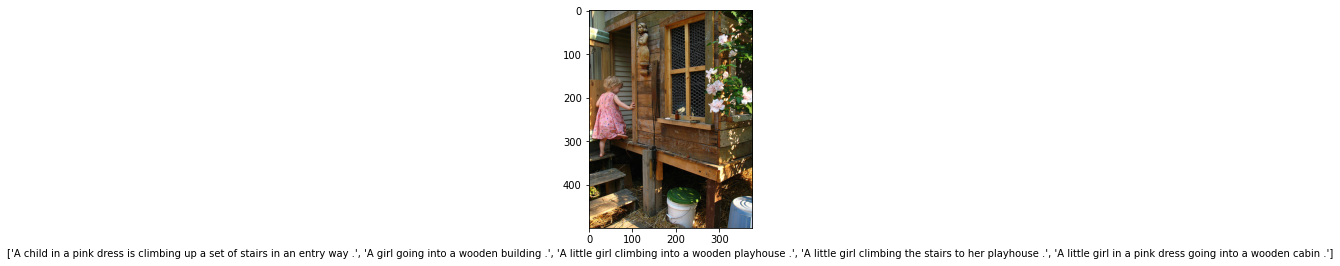

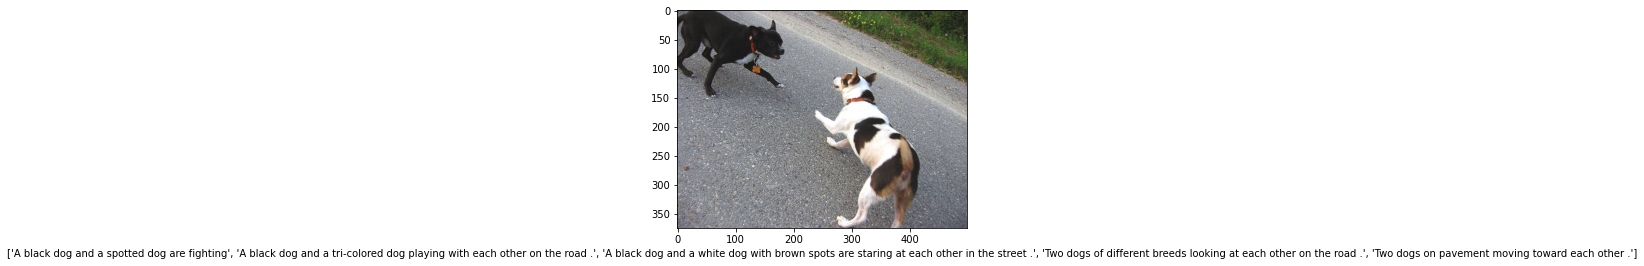

In [17]:
import matplotlib.pyplot as plt

for i in range(2):
    plt.figure()
    img_name = images[i]
    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)

1000268201_693b08cb0e.jpg
dict_keys(['1000268201_693b08cb0e.jpg', '1001773457_577c3a7d70.jpg', '1002674143_1b742ab4b8.jpg', '1003163366_44323f5815.jpg', '1007129816_e794419615.jpg', '1007320043_627395c3d8.jpg', '1009434119_febe49276a.jpg', '1012212859_01547e3f17.jpg', '1015118661_980735411b.jpg', '1015584366_dfcec3c85a.jpg', '101654506_8eb26cfb60.jpg', '101669240_b2d3e7f17b.jpg', '1016887272_03199f49c4.jpg', '1019077836_6fc9b15408.jpg', '1019604187_d087bf9a5f.jpg', '1020651753_06077ec457.jpg', '1022454332_6af2c1449a.jpg', '1022454428_b6b660a67b.jpg', '1022975728_75515238d8.jpg', '102351840_323e3de834.jpg', '1024138940_f1fefbdce1.jpg', '102455176_5f8ead62d5.jpg', '1026685415_0431cbf574.jpg', '1028205764_7e8df9a2ea.jpg', '1030985833_b0902ea560.jpg', '103106960_e8a41d64f8.jpg', '103195344_5d2dc613a3.jpg', '103205630_682ca7285b.jpg', '1032122270_ea6f0beedb.jpg', '1032460886_4a598ed535.jpg', '1034276567_49bb87c51c.jpg', '104136873_5b5d41be75.jpg', '1042020065_fb3d3ba5ba.jpg', '1042590306_95

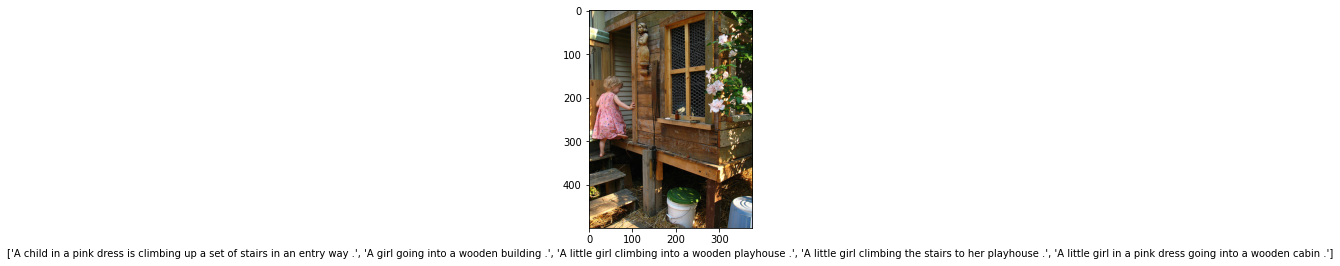

In [19]:
import matplotlib.pyplot as plt

for k in images_features.keys():
    print(k)
    print(images_features.keys())
    plt.figure()
    
    img_name = '/content/drive/MyDrive/Colab Notebooks/Image-Captioning-CNN-LSTM/Flickr_Data/Images/' + k
    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)
    
    break

In [20]:
print(images_features)

{'1000268201_693b08cb0e.jpg': array([0.1672582 , 0.46361965, 0.00352367, ..., 0.11895228, 0.42634124,
       1.3226005 ], dtype=float32), '1001773457_577c3a7d70.jpg': array([1.4409858 , 1.0435452 , 0.2366094 , ..., 0.39719477, 0.04307767,
       0.30509195], dtype=float32), '1002674143_1b742ab4b8.jpg': array([1.54498208e+00, 9.86829460e-01, 1.13063616e-04, ...,
       0.00000000e+00, 1.13475096e+00, 4.74885315e-01], dtype=float32), '1003163366_44323f5815.jpg': array([0.9030599 , 0.1139086 , 0.7488716 , ..., 0.33106768, 0.        ,
       0.        ], dtype=float32), '1007129816_e794419615.jpg': array([0.33239806, 2.2867317 , 0.        , ..., 0.20395604, 0.        ,
       0.25451976], dtype=float32), '1007320043_627395c3d8.jpg': array([1.6907182 , 0.7195168 , 0.09514083, ..., 0.        , 0.24099311,
       0.00307022], dtype=float32), '1009434119_febe49276a.jpg': array([0.40478334, 0.33644965, 0.43302464, ..., 0.36723465, 0.09850353,
       0.16856556], dtype=float32), '1012212859_0154

In [21]:
print(captions_dict)

{'1000268201_693b08cb0e.jpg': ['A child in a pink dress is climbing up a set of stairs in an entry way .', 'A girl going into a wooden building .', 'A little girl climbing into a wooden playhouse .', 'A little girl climbing the stairs to her playhouse .', 'A little girl in a pink dress going into a wooden cabin .'], '1001773457_577c3a7d70.jpg': ['A black dog and a spotted dog are fighting', 'A black dog and a tri-colored dog playing with each other on the road .', 'A black dog and a white dog with brown spots are staring at each other in the street .', 'Two dogs of different breeds looking at each other on the road .', 'Two dogs on pavement moving toward each other .'], '1002674143_1b742ab4b8.jpg': ['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .', 'A little girl is sitting in front of a large painted rainbow .', 'A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .', 'There is a girl with pigt

In [22]:
def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified

In [23]:
for k,v in captions_dict.items():
    print(k)
    print(v)
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

1000268201_693b08cb0e.jpg
['A child in a pink dress is climbing up a set of stairs in an entry way .', 'A girl going into a wooden building .', 'A little girl climbing into a wooden playhouse .', 'A little girl climbing the stairs to her playhouse .', 'A little girl in a pink dress going into a wooden cabin .']
1001773457_577c3a7d70.jpg
['A black dog and a spotted dog are fighting', 'A black dog and a tri-colored dog playing with each other on the road .', 'A black dog and a white dog with brown spots are staring at each other in the street .', 'Two dogs of different breeds looking at each other on the road .', 'Two dogs on pavement moving toward each other .']
1002674143_1b742ab4b8.jpg
['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .', 'A little girl is sitting in front of a large painted rainbow .', 'A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .', 'There is a girl with pigtails sitting

In [24]:
print(captions_dict)

{'1000268201_693b08cb0e.jpg': ['startofseq a child in a pink dress is climbing up a set of stairs in an entry way . endofseq', 'startofseq a girl going into a wooden building . endofseq', 'startofseq a little girl climbing into a wooden playhouse . endofseq', 'startofseq a little girl climbing the stairs to her playhouse . endofseq', 'startofseq a little girl in a pink dress going into a wooden cabin . endofseq'], '1001773457_577c3a7d70.jpg': ['startofseq a black dog and a spotted dog are fighting endofseq', 'startofseq a black dog and a tri-colored dog playing with each other on the road . endofseq', 'startofseq a black dog and a white dog with brown spots are staring at each other in the street . endofseq', 'startofseq two dogs of different breeds looking at each other on the road . endofseq', 'startofseq two dogs on pavement moving toward each other . endofseq'], '1002674143_1b742ab4b8.jpg': ['startofseq a little girl covered in paint sits in front of a painted rainbow with her hand

In [25]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:
                count_words[word] = 0
            else:
                count_words[word] += 1

In [26]:
len(count_words)

3988

In [27]:
print(count_words)

{'startofseq': 7499, 'a': 11935, 'child': 338, 'in': 3468, 'pink': 153, 'dress': 61, 'is': 1800, 'climbing': 151, 'up': 281, 'set': 15, 'of': 1224, 'stairs': 13, 'an': 454, 'entry': 0, 'way': 20, '.': 6786, 'endofseq': 7499, 'girl': 710, 'going': 23, 'into': 257, 'wooden': 57, 'building': 68, 'little': 417, 'playhouse': 1, 'the': 3459, 'to': 655, 'her': 238, 'cabin': 1, 'black': 748, 'dog': 1707, 'and': 1648, 'spotted': 7, 'are': 580, 'fighting': 17, 'tri-colored': 5, 'playing': 365, 'with': 1497, 'each': 75, 'other': 137, 'on': 2055, 'road': 78, 'white': 674, 'brown': 509, 'spots': 4, 'staring': 10, 'at': 581, 'street': 161, 'two': 1005, 'dogs': 428, 'different': 6, 'breeds': 3, 'looking': 162, 'pavement': 9, 'moving': 6, 'toward': 22, 'covered': 72, 'paint': 3, 'sits': 129, 'front': 261, 'painted': 13, 'rainbow': 6, 'hands': 46, 'bowl': 3, 'sitting': 249, 'large': 240, 'small': 277, 'grass': 317, 'plays': 116, 'fingerpaints': 0, 'canvas': 3, 'it': 80, 'there': 59, 'pigtails': 9, 'pai

In [28]:
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    print(k)
    print(count_words[k])
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1

Streaming output truncated to the last 5000 lines.
bars
9
hangs
6
monkey
5
jungle
8
gym
13
ladder
3
swinging
28
saver
0
wings
1
floaties
0
hit
3
tracks
13
railroad
9
track
25
jean
5
capris
0
barefoot
9
bearded
2
turquoise
1
peace
6
stops
2
symbol
0
headdress
3
shaved
2
crazy
0
hairdo
0
earrings
3
bound
1
flower-covered
0
misty
2
heather
0
surfboards
1
prepare
1
high-five
1
participating
1
wake-boards
0
attempt
3
give
2
simultaneously
0
decide
0
signal
1
armor
0
examining
1
tire
11
racers
0
drove
0
motorists
0
oddly
0
designed
0
racing
23
bucket
15
beneath
1
boogie
0
trampoline
18
telephone
0
power
1
lines
3
poles
11
electrical
0
wires
0
puppies
8
chase
5
heavily
1
foliaged
0
cold
8
but
1
morning
2
sets
0
trekking
0
hello
2
kitty
3
figure
3
yellowish
0
slightly
1
floats
5
peers
2
bulky
0
snoopy
1
huge
10
scene
3
skimpy
2
rain
5
screams
0
squinting
0
still
7
hillside
7
skating
8
instructor
0
skate
6
hold
11
go
7
museum
2
couches
1
lie
0
puffy
2
tired
1
silhouetted
0
stunning
0
retriever


In [29]:
len(new_dict)

3988

In [30]:
print(new_dict)

{'startofseq': 1, 'a': 2, 'child': 3, 'in': 4, 'pink': 5, 'dress': 6, 'is': 7, 'climbing': 8, 'up': 9, 'set': 10, 'of': 11, 'stairs': 12, 'an': 13, 'entry': 14, 'way': 15, '.': 16, 'endofseq': 17, 'girl': 18, 'going': 19, 'into': 20, 'wooden': 21, 'building': 22, 'little': 23, 'playhouse': 24, 'the': 25, 'to': 26, 'her': 27, 'cabin': 28, 'black': 29, 'dog': 30, 'and': 31, 'spotted': 32, 'are': 33, 'fighting': 34, 'tri-colored': 35, 'playing': 36, 'with': 37, 'each': 38, 'other': 39, 'on': 40, 'road': 41, 'white': 42, 'brown': 43, 'spots': 44, 'staring': 45, 'at': 46, 'street': 47, 'two': 48, 'dogs': 49, 'different': 50, 'breeds': 51, 'looking': 52, 'pavement': 53, 'moving': 54, 'toward': 55, 'covered': 56, 'paint': 57, 'sits': 58, 'front': 59, 'painted': 60, 'rainbow': 61, 'hands': 62, 'bowl': 63, 'sitting': 64, 'large': 65, 'small': 66, 'grass': 67, 'plays': 68, 'fingerpaints': 69, 'canvas': 70, 'it': 71, 'there': 72, 'pigtails': 73, 'painting': 74, 'young': 75, 'outside': 76, 'man': 

In [31]:
new_dict['<OUT>'] = len(new_dict)

In [32]:
len(new_dict)

3989

In [33]:
captions_backup = captions_dict.copy()

In [35]:
print(captions_backup)

{'1000268201_693b08cb0e.jpg': ['startofseq a child in a pink dress is climbing up a set of stairs in an entry way . endofseq', 'startofseq a girl going into a wooden building . endofseq', 'startofseq a little girl climbing into a wooden playhouse . endofseq', 'startofseq a little girl climbing the stairs to her playhouse . endofseq', 'startofseq a little girl in a pink dress going into a wooden cabin . endofseq'], '1001773457_577c3a7d70.jpg': ['startofseq a black dog and a spotted dog are fighting endofseq', 'startofseq a black dog and a tri-colored dog playing with each other on the road . endofseq', 'startofseq a black dog and a white dog with brown spots are staring at each other in the street . endofseq', 'startofseq two dogs of different breeds looking at each other on the road . endofseq', 'startofseq two dogs on pavement moving toward each other . endofseq'], '1002674143_1b742ab4b8.jpg': ['startofseq a little girl covered in paint sits in front of a painted rainbow with her hand

In [36]:
print(captions_dict)

{'1000268201_693b08cb0e.jpg': ['startofseq a child in a pink dress is climbing up a set of stairs in an entry way . endofseq', 'startofseq a girl going into a wooden building . endofseq', 'startofseq a little girl climbing into a wooden playhouse . endofseq', 'startofseq a little girl climbing the stairs to her playhouse . endofseq', 'startofseq a little girl in a pink dress going into a wooden cabin . endofseq'], '1001773457_577c3a7d70.jpg': ['startofseq a black dog and a spotted dog are fighting endofseq', 'startofseq a black dog and a tri-colored dog playing with each other on the road . endofseq', 'startofseq a black dog and a white dog with brown spots are staring at each other in the street . endofseq', 'startofseq two dogs of different breeds looking at each other on the road . endofseq', 'startofseq two dogs on pavement moving toward each other . endofseq'], '1002674143_1b742ab4b8.jpg': ['startofseq a little girl covered in paint sits in front of a painted rainbow with her hand

In [37]:
captions_dict = captions_backup.copy()

In [38]:
print(captions_dict)

{'1000268201_693b08cb0e.jpg': ['startofseq a child in a pink dress is climbing up a set of stairs in an entry way . endofseq', 'startofseq a girl going into a wooden building . endofseq', 'startofseq a little girl climbing into a wooden playhouse . endofseq', 'startofseq a little girl climbing the stairs to her playhouse . endofseq', 'startofseq a little girl in a pink dress going into a wooden cabin . endofseq'], '1001773457_577c3a7d70.jpg': ['startofseq a black dog and a spotted dog are fighting endofseq', 'startofseq a black dog and a tri-colored dog playing with each other on the road . endofseq', 'startofseq a black dog and a white dog with brown spots are staring at each other in the street . endofseq', 'startofseq two dogs of different breeds looking at each other on the road . endofseq', 'startofseq two dogs on pavement moving toward each other . endofseq'], '1002674143_1b742ab4b8.jpg': ['startofseq a little girl covered in paint sits in front of a painted rainbow with her hand

In [39]:
print(captions_backup)

{'1000268201_693b08cb0e.jpg': ['startofseq a child in a pink dress is climbing up a set of stairs in an entry way . endofseq', 'startofseq a girl going into a wooden building . endofseq', 'startofseq a little girl climbing into a wooden playhouse . endofseq', 'startofseq a little girl climbing the stairs to her playhouse . endofseq', 'startofseq a little girl in a pink dress going into a wooden cabin . endofseq'], '1001773457_577c3a7d70.jpg': ['startofseq a black dog and a spotted dog are fighting endofseq', 'startofseq a black dog and a tri-colored dog playing with each other on the road . endofseq', 'startofseq a black dog and a white dog with brown spots are staring at each other in the street . endofseq', 'startofseq two dogs of different breeds looking at each other on the road . endofseq', 'startofseq two dogs on pavement moving toward each other . endofseq'], '1002674143_1b742ab4b8.jpg': ['startofseq a little girl covered in paint sits in front of a painted rainbow with her hand

In [40]:
for k, vv in captions_dict.items():
    for v in vv:
        print(vv.index(v))
        encoded = []
        for word in v.split():  
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])
        captions_dict[k][vv.index(v)] = encoded

Streaming output truncated to the last 5000 lines.
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4

In [41]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [42]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 2, 5, 6, 7, 8, 9, 2, 10, 11, 12, 4, 13, 14, 15, 16, 17]
[1, 2, 29, 30, 31, 2, 42, 30, 37, 43, 44, 33, 45, 46, 38, 39, 4, 25, 47, 16, 17]
[1, 2, 23, 18, 56, 4, 57, 58, 4, 59, 11, 2, 60, 61, 37, 27, 62, 4, 2, 63, 16, 17]
[1, 2, 66, 18, 4, 25, 67, 68, 37, 69, 4, 59, 11, 2, 42, 70, 37, 2, 61, 40, 71, 16, 17]
[1, 2, 250, 31, 13, 251, 136, 252, 253, 82, 25, 254, 136, 64, 88, 26, 2, 255, 37, 2, 131, 82, 256, 16, 17]
[1, 2, 77, 7, 93, 25, 247, 11, 2, 237, 9, 26, 81, 226, 4, 59, 11, 400, 340, 80, 188, 77, 192, 40, 16, 17]
[1, 2, 77, 4, 144, 565, 2, 23, 149, 9, 4, 25, 230, 31, 589, 195, 83, 26, 590, 389, 591, 298, 106, 219, 83, 16, 17]
[1, 25, 18, 4, 25, 656, 586, 657, 7, 145, 88, 26, 48, 75, 200, 658, 147, 7, 103, 2, 29, 659, 31, 25, 39, 7, 660, 661, 16, 17]
[1, 72, 33, 349, 75, 200, 136, 147, 561, 904, 93, 2, 905, 906, 136, 147, 37, 134, 907, 884, 31, 849, 4, 27, 226, 136, 31, 147, 37, 908, 473, 16, 17]
[1, 2, 18, 4, 2, 112, 31, 29, 1485, 37, 42, 1265, 7, 145, 88, 26, 2, 77, 4, 2,

In [43]:
Batch_size = 5000
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]
                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out

In [44]:
X, y_in, y_out = generator(images_features, captions_dict)

In [45]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')

In [46]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [47]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)
image_model = Sequential()
image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))
image_model.summary()

language_model = Sequential()
language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))
language_model.summary()
conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 37, 128)           0         
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 37, 128)           510592    
_________________________________________________________________
lstm (LSTM)                  (None, 37, 256)           394240    
_________________________________________________________________
time_distributed (TimeDistri (None, 37, 128)           32896     
Total params: 937,728
Traina

In [48]:
model.fit([X, y_in], y_out, batch_size=512, epochs=50)

Epoch 1/50
189/189 [==============================] - 20s 85ms/step - loss: 5.4301 - accuracy: 0.1168
Epoch 2/50
189/189 [==============================] - 16s 86ms/step - loss: 5.0650 - accuracy: 0.1270
Epoch 3/50
189/189 [==============================] - 17s 88ms/step - loss: 4.6029 - accuracy: 0.2188
Epoch 4/50
189/189 [==============================] - 17s 89ms/step - loss: 4.3544 - accuracy: 0.2333
Epoch 5/50
189/189 [==============================] - 17s 90ms/step - loss: 4.1825 - accuracy: 0.2538
Epoch 6/50
189/189 [==============================] - 17s 89ms/step - loss: 3.9199 - accuracy: 0.2903
Epoch 7/50
189/189 [==============================] - 17s 88ms/step - loss: 3.6956 - accuracy: 0.3124
Epoch 8/50
189/189 [==============================] - 17s 89ms/step - loss: 3.4505 - accuracy: 0.3432
Epoch 9/50
189/189 [==============================] - 17s 89ms/step - loss: 3.2887 - accuracy: 0.3626
Epoch 10/50
189/189 [==============================] - 17s 89ms/step - loss: 3.184

In [49]:
inv_dict = {v:k for k, v in new_dict.items()}

In [50]:
model.save('/content/drive/MyDrive/Colab Notebooks/Image-Captioning-CNN-LSTM/model.h5')

In [51]:
model.save_weights('/content/drive/MyDrive/Colab Notebooks/Image-Captioning-CNN-LSTM/mine_model_weights.h5')

In [52]:
np.save('/content/drive/MyDrive/Colab Notebooks/Image-Captioning-CNN-LSTM/vocab.npy', new_dict)

In [53]:
def getImage(x):
    test_img_path = images[x]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    test_img = cv2.resize(test_img, (224,224))
    test_img = np.reshape(test_img, (1,224,224,3))
    return test_img

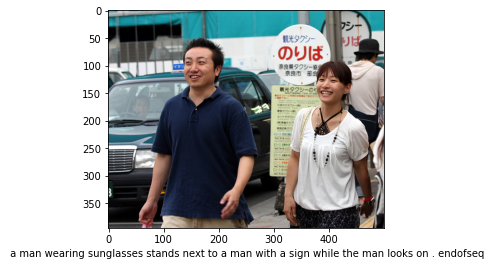

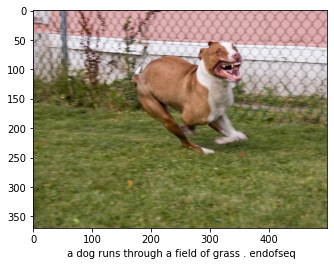

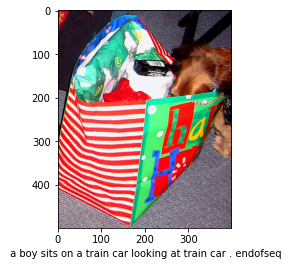

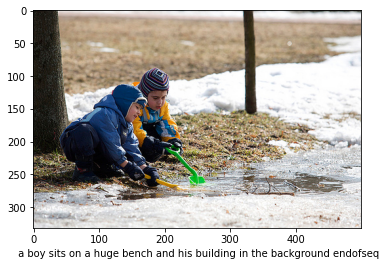

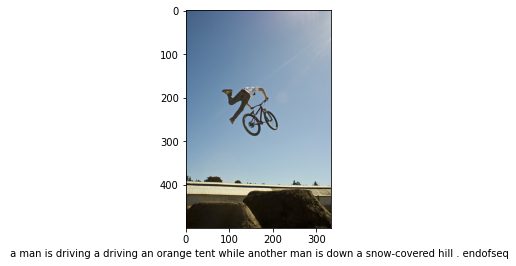

In [54]:
for i in range(5):
    no = np.random.randint(1500,7000,(1,1))[0,0]
    test_feature = modele.predict(getImage(no)).reshape(1,2048)
    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    text_inp = ['startofseq']
    count = 0
    caption = ''
    while count < 25:
        count += 1
        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]
        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)
        prediction = np.argmax(model.predict([test_feature, encoded]))
        sampled_word = inv_dict[prediction]
        caption = caption + ' ' + sampled_word
            
        if sampled_word == 'endofseq':
            break
        text_inp.append(sampled_word)   
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption)

In [55]:
from keras.applications import ResNet50
resnet = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),pooling='avg')
resnet.save('/content/drive/MyDrive/Colab Notebooks/Image-Captioning-CNN-LSTM/resnet.h5')

94773248/94765736 [==============================] - 1s 0us/step
